<a href="https://colab.research.google.com/github/souravskr/ducspond_ai/blob/SVHN_CNN/SVN_CNN_64_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libraries
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import  TensorBoard
import matplotlib.pyplot as plt
from google.colab import drive
import time

In [0]:
NAME = 'SVHN_CNN_64*5-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir='drive/My Drive/Colab Notebooks/logs/{}'.format(NAME))

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_data = loadmat('drive/My Drive/Colab Notebooks/train_32x32.mat')
test_data = loadmat ('drive/My Drive/Colab Notebooks/test_32x32.mat')

In [0]:
# Splitting train and test data into X and y
X_train, y_train = train_data['X'], train_data['y']
X_test, y_test = test_data['X'], test_data['y']
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
y_test.shape

(26032, 1)

In [0]:
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

In [0]:
y_test.shape

(26032,)

In [0]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [0]:
y_test.shape

(26032,)

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)


In [0]:

X_train, X_val, y_train, y_val = train_test_split (X_train, y_train, test_size = 0.2, random_state = 0)

# Model
Now we will build our  **2*64** convolution layer neural network

In [0]:
model = Sequential()

# First layer
model.add(Convolution2D(64,[5,5],data_format='channels_last',activation='relu',input_shape =(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides= 2))

# Second layer
model.add (Convolution2D(64, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Third layer
model.add(Flatten())
model.add(Dense(100))

# Outpur layer
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

Here is the summary of our model

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 64)        102464    
_________________________________________________________________
activation_15 (Activation)   (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               160100    
__________

# Training the Model
So, we have built our model, now its time to train our model with X_train and y_train. We will use 10 eopchs and batch size of 200.

In [0]:
model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size = 200, epochs= 10, callbacks=[tensorboard])

Train on 58605 samples, validate on 14652 samples
Epoch 1/10
58605/58605 [==============================] - 8s 144us/step - loss: 1.2403 - acc: 0.5973 - val_loss: 0.8943 - val_acc: 0.7297
Epoch 2/10
58605/58605 [==============================] - 8s 140us/step - loss: 0.5615 - acc: 0.8426 - val_loss: 0.5457 - val_acc: 0.8501
Epoch 3/10
58605/58605 [==============================] - 8s 131us/step - loss: 0.4709 - acc: 0.8681 - val_loss: 0.5693 - val_acc: 0.8354
Epoch 4/10
58605/58605 [==============================] - 7s 128us/step - loss: 0.4170 - acc: 0.8825 - val_loss: 0.4121 - val_acc: 0.8908
Epoch 5/10
58605/58605 [==============================] - 7s 126us/step - loss: 0.3813 - acc: 0.8929 - val_loss: 0.6760 - val_acc: 0.8023
Epoch 6/10
58605/58605 [==============================] - 7s 125us/step - loss: 0.3495 - acc: 0.9004 - val_loss: 0.9146 - val_acc: 0.7429
Epoch 7/10
58605/58605 [==============================] - 7s 125us/step - loss: 0.3299 - acc: 0.9050 - val_loss: 0.6104 - 

We have got **90% validation accuracy and 39% validation loss** after 10 epochs on the training dataset

# Evaluation the Model
With the ** X_test & y_test** we will evaluate our model, but before that we will organize the y_test categorically based on 10 classes.


In [0]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)

In [0]:
y_test.shape

(26032, 10)

In [0]:
val_loss, val_acc = model.evaluate (X_test, y_test)

26032/26032 [==============================] - 4s 166us/step


In [0]:
print(val_loss)

0.47027134678264154


In [0]:
print(val_acc)

0.8824907805777504


Okay, we have got **88% validation accuracy & 47% validation loss** on the testing dataset

# Prediction

In [0]:
predictions = model.predict(X_test)

In [0]:
predictions[0]

array([3.2455617e-08, 1.7490786e-06, 3.2553253e-05, 2.5520351e-02,
       4.9673649e-06, 9.7088796e-01, 9.4391679e-04, 7.0854777e-04,
       2.2968437e-04, 1.6701282e-03], dtype=float32)

In [0]:
np.argmax(predictions[5])

1

In [0]:
np.argmax(y_test[5])

1

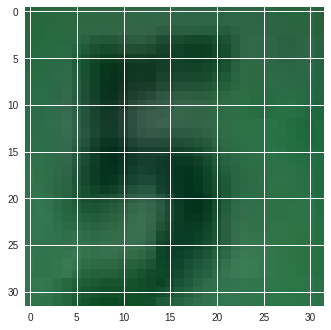

In [0]:
plt.imshow(X_test[0])

In [0]:
class_names = ['Zero','One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  true_label = np.argmax(true_label)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

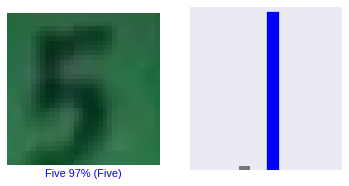

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

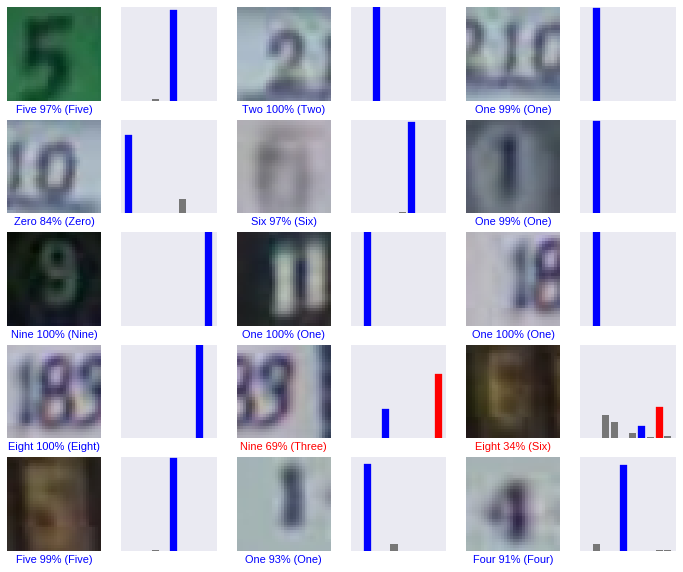

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions,  y_test)
plt.show()


In [0]:
model.save('SVHN_CNN_64*5.h5')